In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

import os
import glob

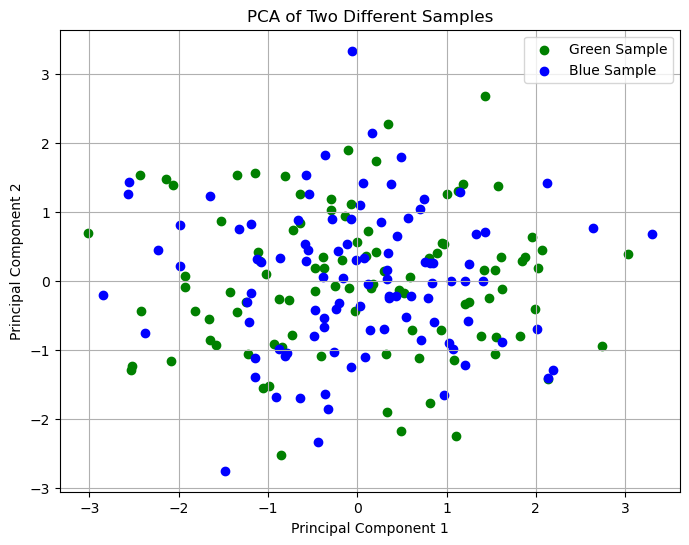

In [6]:

# Recreating the first dataset (green)
np.random.seed(0)
n_samples = 100
feature_1 = np.random.normal(0, 1, n_samples)
feature_2 = feature_1 + np.random.normal(0, 2, n_samples)
feature_3 = feature_1 + np.random.normal(0, 3, n_samples)
feature_4 = np.random.normal(0, 4, n_samples)
green_data = pd.DataFrame({'Feature_1': feature_1, 'Feature_2': feature_2, 'Feature_3': feature_3, 'Feature_4': feature_4})
green_data = StandardScaler().fit_transform(green_data)

# Creating a second dataset (blue)
np.random.seed(1)  # Different seed for variation
blue_data = np.random.normal(0, 1, (n_samples, 4))  # Generating random data
blue_data = StandardScaler().fit_transform(blue_data)  # Standardizing the blue data

# Applying PCA to both datasets
pca = PCA(n_components=2)
pca_green = pca.fit_transform(green_data)
pca_blue = pca.fit_transform(blue_data)

# Converting to DataFrame for easy plotting
pca_green_df = pd.DataFrame(data=pca_green, columns=['PC1', 'PC2'])
pca_blue_df = pd.DataFrame(data=pca_blue, columns=['PC1', 'PC2'])

# Plotting both datasets
plt.figure(figsize=(8, 6))
plt.scatter(pca_green_df['PC1'], pca_green_df['PC2'], color='green', label='Green Sample')
plt.scatter(pca_blue_df['PC1'], pca_blue_df['PC2'], color='blue', label='Blue Sample')
plt.title('PCA of Two Different Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## K401 protein

In [35]:
# File path pattern
file_pattern = "../../data/01-k401-biotin_strep/125nM/2ul/piv_data/PIVlab_****.txt"

# Get a list of all the txt files
files = sorted(glob.glob(file_pattern))

# Dataframe to store the mean values of each feature for each file
mean_values_df = pd.DataFrame()

# Iterating through each file

for file in files:
    df = pd.read_csv(file, skiprows=2).fillna(0)
    mean_values = df.mean()
    mean_values_df = pd.concat([mean_values_df, mean_values.to_frame().T], ignore_index=True)

# reset index and turn into a column named 'time' and convert to minutes
mean_values_df = mean_values_df.reset_index().rename(columns={'index':'time [min]'})
mean_values_df['time [min]'] = mean_values_df['time [min]'] * 3 / 60

mean_values_df

,time [min],x [m],y [m],u [m/s],v [m/s],Vector type [-],vorticity [1/s],magnitude [m/s],divergence [1/s],dcev [1],simple shear [1/s],simple strain [1/s],vector direction [degrees]
0,0.00,0.001404,0.001404,1.541597e-07,1.136568e-08,1.608779,0.000204,6.331139e-07,-0.000006,1.967121,0.000123,0.000028,2.229278
1,0.05,0.001404,0.001404,1.787171e-07,-1.150772e-08,1.617273,0.000214,6.939415e-07,-0.000218,1.938772,0.000135,-0.000067,0.374673
2,0.10,0.001404,0.001404,1.784331e-07,-3.229024e-08,1.615351,0.000260,6.650160e-07,-0.000069,2.047398,0.000032,-0.000045,-1.035608
3,0.15,0.001404,0.001404,1.311937e-07,-8.477126e-10,1.618947,0.000118,6.496438e-07,-0.000202,2.099330,-0.000066,-0.000124,-0.682844
4,0.20,0.001404,0.001404,1.599138e-07,-3.586022e-08,1.616901,0.000312,6.761772e-07,-0.000282,2.282753,0.000029,-0.000080,-3.043851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,141.55,0.001404,0.001404,2.788492e-08,-1.135871e-07,1.516151,0.000347,7.814984e-07,-0.000118,2.304504,0.000017,-0.000024,-1.859721
2832,141.60,0.001404,0.001404,4.332498e-08,-1.081216e-07,1.509579,0.000377,7.958857e-07,-0.000121,3.548908,-0.000043,-0.000170,-1.938857
2833,141.65,0.001404,0.001404,4.735643e-08,-9.717311e-08,1.515345,0.000320,7.863782e-07,-0.000053,2.941825,0.000019,-0.000094,-1.252143
2834,141.70,0.001404,0.001404,2.149922e-08,-1.040853e-07,1.518817,0.000510,7.808572e-07,0.000001,2.430487,-0.000018,-0.000021,-1.030028


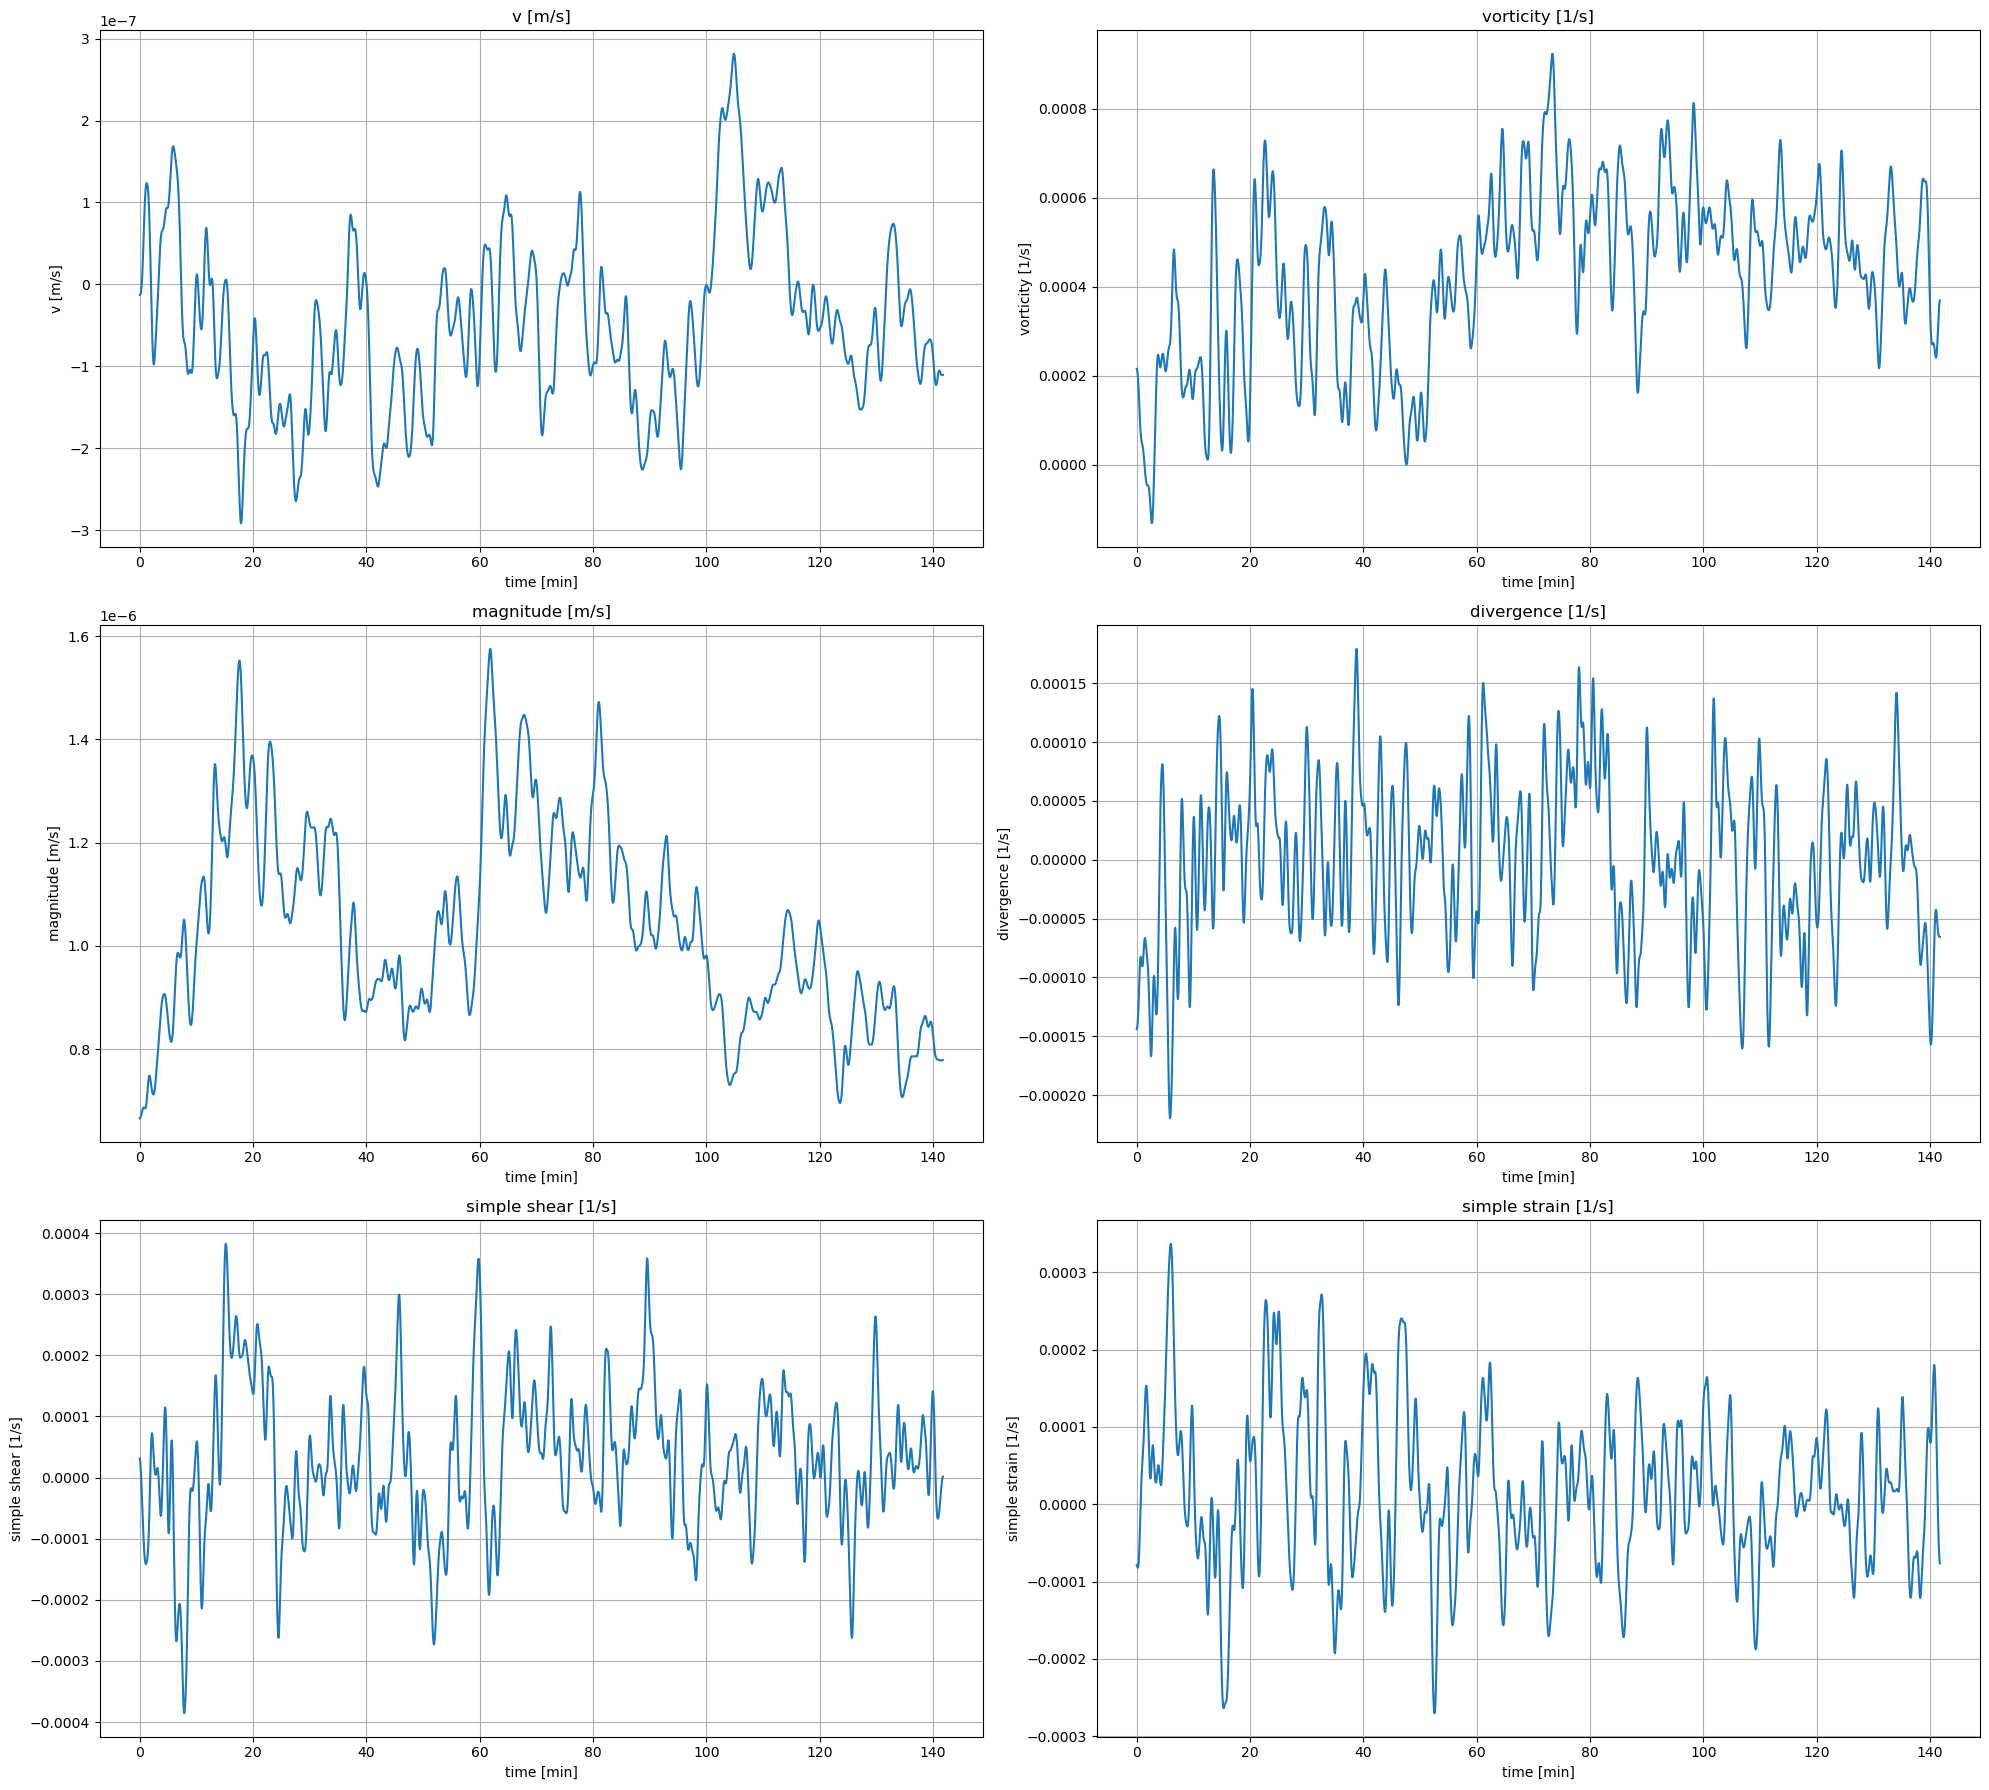

In [32]:
features = mean_values_df.columns

# Drop all features except 'v [m/s]', 'magnitude [m/s]', 'vorticity [1/s]', 'divergence [1/s]', 'simple shear [1/s]', 'simple strain [1/s]'
features = ['v [m/s]', 'vorticity [1/s]', 'magnitude [m/s]', 'divergence [1/s]', 'simple shear [1/s]', 'simple strain [1/s]']

# generate plots for each feature and display them 3x3
fig, axs = plt.subplots(3,2, figsize=(20,18))
axs = axs.ravel()
for i, feature in enumerate(features):
    # Apply Gaussian filter to the data
    smoothed_data = gaussian_filter(mean_values_df[feature], sigma=5)
    
    axs[i].plot(mean_values_df['time [min]'], smoothed_data)
    axs[i].set_title(feature)
    axs[i].set_xlabel('time [min]')
    axs[i].set_ylabel(feature)
    axs[i].grid(True)  # Add grid to the plot
plt.tight_layout()
plt.show()

In [11]:
def mean_values(file_pattern):

    # Get a list of all the txt files
    files = sorted(glob.glob(file_pattern))

    # Dataframe to store the mean values of each feature for each file
    mean_values_df = pd.DataFrame()

    # Iterating through each file

    for file in files:
        df = pd.read_csv(file, skiprows=2).fillna(0)
        mean_values = df.mean()
        mean_values_df = pd.concat([mean_values_df, mean_values.to_frame().T], ignore_index=True)

    # reset index and turn into a column named 'time' and convert to minutes
    mean_values_df = mean_values_df.reset_index().rename(columns={'index':'time [min]'})
    mean_values_df['time [min]'] = mean_values_df['time [min]'] * 3 / 60

    return mean_values_df


In [12]:
file_pattern = "../../data/01-k401-biotin_strep/125nM/2ul/piv_data/PIVlab_****.txt"
df125 = mean_values(file_pattern)


file_pattern = "../../data/01-k401-biotin_strep/250nM/2ul/piv_data/PIVlab_****.txt"
df250 = mean_values(file_pattern)


file_pattern = "../../data/01-k401-biotin_strep/500nM/2ul/piv_data/PIVlab_****.txt"
df500 = mean_values(file_pattern)

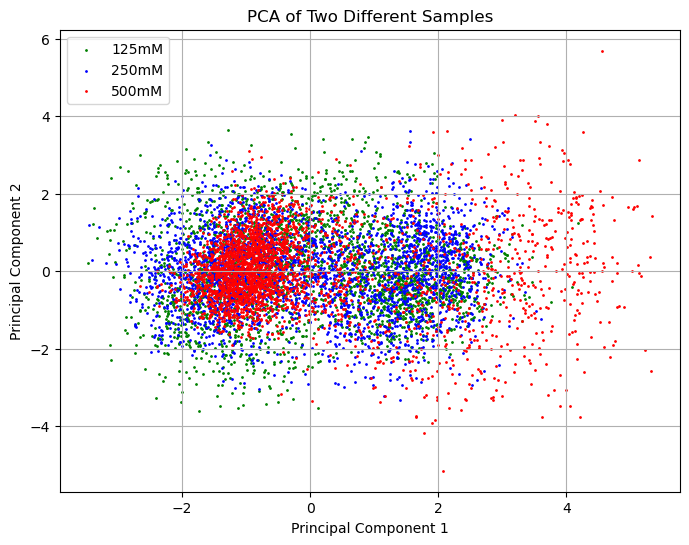

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Recreating the first dataset (green)
data_125mM = StandardScaler().fit_transform(df125.iloc[:, 5:])

data_250mM = StandardScaler().fit_transform(df250.iloc[:, 5:])  

data_500mM = StandardScaler().fit_transform(df500.iloc[:, 5:])  


# Applying PCA to both datasets
pca = PCA(n_components=2)
pca_125 = pca.fit_transform(data_125mM)
pca_250 = pca.fit_transform(data_250mM)
pca_500 = pca.fit_transform(data_500mM)

# Converting to DataFrame for easy plotting
pca_125_df = pd.DataFrame(data=pca_125, columns=['PC1', 'PC2'])
pca_250_df = pd.DataFrame(data=pca_250, columns=['PC1', 'PC2'])
pca_500_df = pd.DataFrame(data=pca_500, columns=['PC1', 'PC2'])

# Plotting both datasets
plt.figure(figsize=(8, 6))
plt.scatter(pca_125_df['PC1'], pca_125_df['PC2'], color='green', label='125mM', s=1)
plt.scatter(pca_250_df['PC1'], pca_250_df['PC2'], color='blue', label='250mM', s=1)
plt.scatter(pca_500_df['PC1'], pca_500_df['PC2'], color='red', label='500mM', s=1)
plt.title('PCA of Two Different Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()



Summary of the process. First we 